In [1]:
import os
import subprocess
# os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

# VDX_dir = '/home/alexi/Documents/ValDX'

VDX_dir = "/home/alexi/Documents/ValDX/"

import sys
sys.path.append(VDX_dir)

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

/home/alexi/Documents/interpretable-hdxer/notebooks/Figure-5_RW_Cluster_size


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [17]:
results_dir ="/home/alexi/Documents/interpretable-hdxer/data/fig3/Sweep-Methods"
# results_dir = '/home/alexi/Documents/ValDX/results/Sweep-Methods/'

# results_dir = "/home/alexi/Documents/ValDX/results/Find-Clusters2"
csvs = glob.glob(results_dir + '/**/*.csv', recursive=True)

print(len(csvs))


150


In [18]:
pkls = glob.glob(results_dir + '/**/*.pkl', recursive=True)

print(len(pkls))


150


In [19]:

data_frames = []

for csv in csvs:
    data_frames.append(pd.read_csv(csv))

df = pd.concat(data_frames)
df.head()

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class
0,0.5,Train,0.442118,train_LXRa_af_small_RW-BV0_fit_1,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,RW-BV0,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,train,train_R3
1,0.5,Val,0.311431,val_LXRa_af_small_RW-BV0_fit_1,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,RW-BV0,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,val,val_R3
2,0.5,Train,-0.026271,train_LXRa_af_small_RW-BV0_fit_2,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,RW-BV0,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,train,train_R3
3,0.5,Val,0.584585,val_LXRa_af_small_RW-BV0_fit_2,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,RW-BV0,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,val,val_R3
4,0.5,Train,0.253395,train_LXRa_af_small_RW-BV0_fit_3,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,RW-BV0,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,train,train_R3


In [20]:
#
df["method"] = df["name"].apply(lambda x: x.split("_")[3])

In [24]:
df["fit"] = df["name"].apply(lambda x: x.split("_")[4])

In [25]:
print(df["fit"].unique())    

['fit' 'bench']


In [26]:
protein_names = ["BPTI", "HOIP", "BRD4", "LXR", "MBP"]

df['protein'] = df['name'].apply(lambda x: x.split('_')[0])
df

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class,method,fit
0,0.5,Train,0.442118,train_LXRa_af_small_RW-BV0_fit_1,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,LXRa,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,train,train_R3,RW-BV0,fit
1,0.5,Val,0.311431,val_LXRa_af_small_RW-BV0_fit_1,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,LXRa,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,val,val_R3,RW-BV0,fit
2,0.5,Train,-0.026271,train_LXRa_af_small_RW-BV0_fit_2,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,LXRa,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,train,train_R3,RW-BV0,fit
3,0.5,Val,0.584585,val_LXRa_af_small_RW-BV0_fit_2,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,LXRa,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,val,val_R3,RW-BV0,fit
4,0.5,Train,0.253395,train_LXRa_af_small_RW-BV0_fit_3,NaN,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequence,RW_bench,R3,LXRa,LXRa_af_small_RW-BV0_fit_RW_bench_R3_k_sequenc...,train,train_R3,RW-BV0,fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,5.0,Train,NaN,train_HOIP_af_small_RW-BV0_bench_R3_2,0.046142,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,BV_bench,Sp,HOIP,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,train,train_Sp,RW-BV0,bench
22,5.0,Train,NaN,train_HOIP_af_small_RW-BV0_bench_R3_3,0.009955,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,BV_bench,Sp,HOIP,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,train,train_Sp,RW-BV0,bench
23,5.0,Val,NaN,val_HOIP_af_small_RW-BV0_bench_R3_1,0.062870,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,BV_bench,Sp,HOIP,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,val,val_Sp,RW-BV0,bench
24,5.0,Val,NaN,val_HOIP_af_small_RW-BV0_bench_R3_2,0.060110,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,BV_bench,Sp,HOIP,HOIP_af_small_RW-BV0_bench_R3_BV_bench_Sp_res_...,val,val_Sp,RW-BV0,bench


In [27]:
# only include df that has non nan mse values
mse_df = df.dropna(subset=["mse"])
val_df = mse_df[mse_df["Type"] == "Val"]

# remove val mse = 0
val_df = val_df[val_df["mse"] != 0]


print(val_df.method.value_counts())

method
RW-BV0    210
BV-RW1    210
NoOpt0    210
BV+RW0    210
BV-RW0    210
RW-BV1    210
Name: count, dtype: int64


In [28]:

# sns.set_context("talk")
method_order = ["NoOpt0", "BV-RW0", "RW-BV1","RW-BV0","BV-RW1",  "BV+RW0"]


val_df['method'] = pd.Categorical(val_df['method'], categories=method_order, ordered=True)
val_df = val_df.sort_values('method')


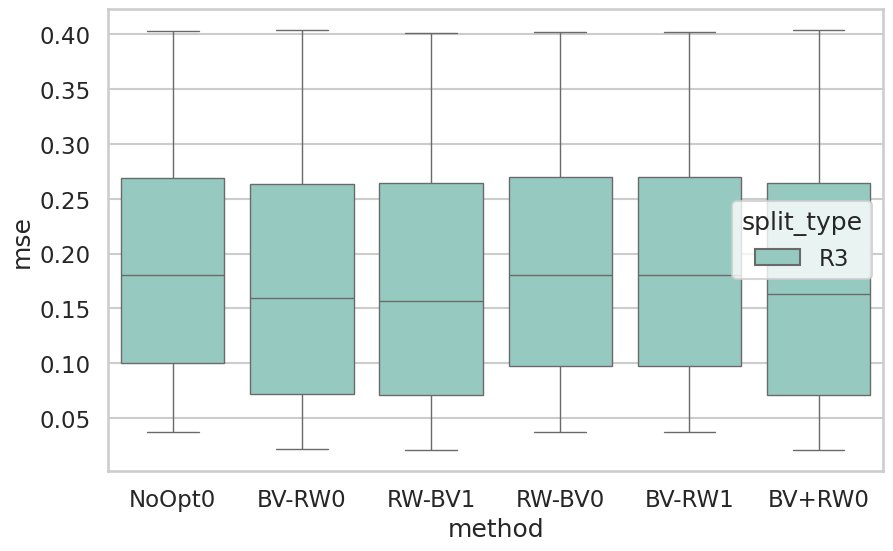

In [29]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

fit_val_df = val_df[val_df["fit"] == "fit"]

sns.boxplot(data=fit_val_df, x="method", y="mse", hue="split_type", ax=ax, palette="Set3")

# ax.set_yscale("log")

plt.show()


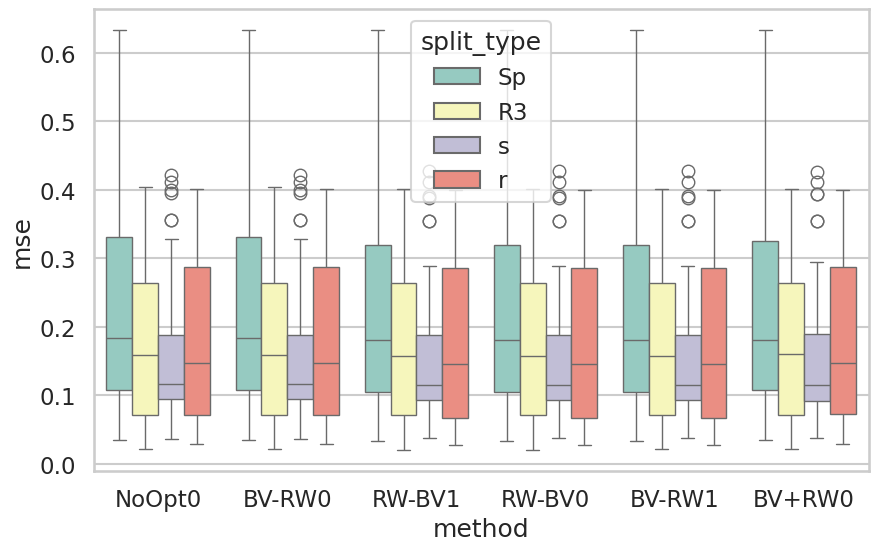

In [31]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

bench_val_df = val_df[val_df["fit"] == "bench"]

sns.boxplot(data=bench_val_df, x="method", y="mse", hue="split_type", ax=ax, palette="Set3")

# ax.set_yscale("log")

plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more

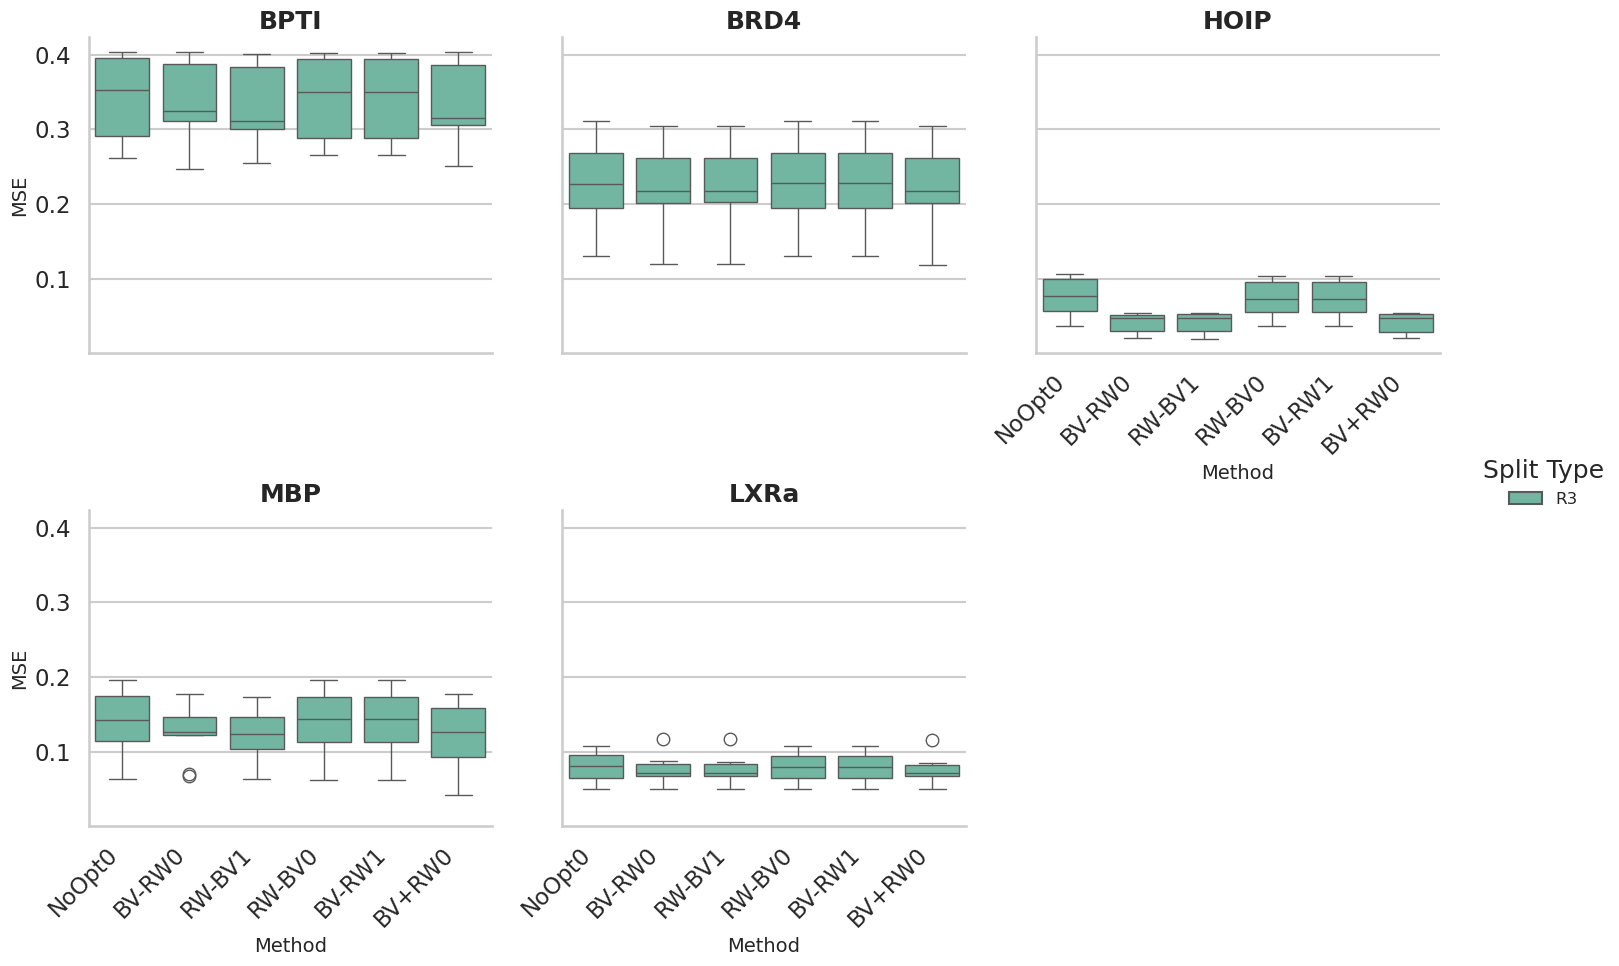

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))

# Create the FacetGrid
g = sns.FacetGrid(fit_val_df, col="protein", col_wrap=3, height=5, aspect=1)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="method", y="mse", hue="split_type", palette=palette)

# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_1535495/604387951.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


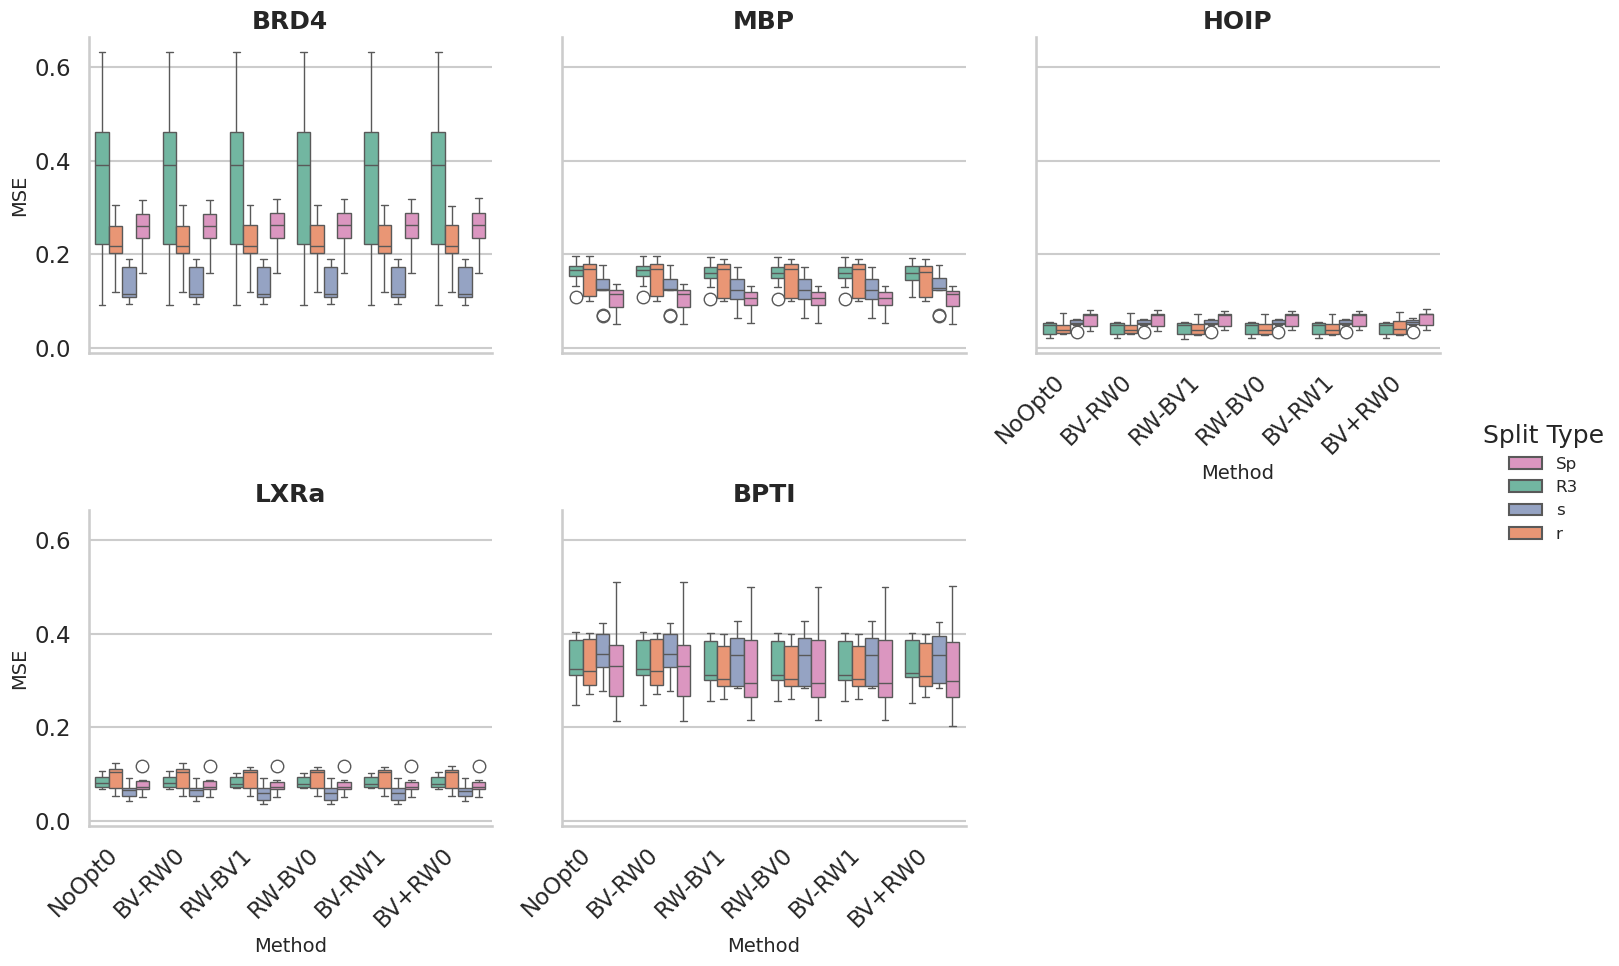

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set context and style
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a custom palette
palette = sns.color_palette("Set2", n_colors=len(val_df["split_type"].unique()))

# Create the FacetGrid
g = sns.FacetGrid(bench_val_df, col="protein", col_wrap=3, height=5, aspect=1)

# Map the boxplot to the FacetGrid
g.map_dataframe(sns.boxplot, x="method", y="mse", hue="split_type", palette=palette)

# Customize the plot
g.set_titles(col_template="{col_name}", fontsize=16, fontweight="bold")
g.set_xlabels("Method", fontsize=14)
g.set_ylabels("MSE", fontsize=14)
g.add_legend(title="Split Type", fontsize=12)

# Rotate x-tick labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust subplot spacing
g.tight_layout()

# Show the plot
plt.show()